In [147]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
filepath = '~/downloads/query.csv'
earthquake = pd.read_csv(filepath) 

In [125]:
# the first place to start is to think about the question we want answered- Are earthquakes
# caused by nuclear powerplants melting down? Let's load the data
gdf = geopandas.GeoDataFrame(
    earthquake, geometry=geopandas.points_from_xy(earthquake.longitude, earthquake.latitude))

We have seen a new era emerge in the last few years, of what some might call a "post-truth"
society, where people can access so much information at the click of a button, that 
determining what is real and what is fake has gotten ever more complicated. Access to so 
much misinformation on the internet has lead to the rise of doubt in commonly held beliefs.
One example of this is a controversy that the Earth is not round but actually flat. 
How do we know what is real? Well the beauty of data science is that there is a framework to
determine for ourselves just what is true and what isn't. This notebook is an example of 
this process, and a story in how we can be our own truth-seekers using data.
Let's say I'm a kid who watched a convincing youtube video that earthquakes were actually from
nuclear energy powerplants melting down and not a product of, say, complicated geological 
processes under established faultlines in the Earth's tectonic plates. 
While the video seemed convincing, I can actually go straight to one of the biggest caches 
of geologic infomation and download their data to test that theory out!

In [164]:
gdf.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2020-12-14T21:20:10.831Z,38.1554,-118.1231,5.2,4.7,ml,33.0,42.76,0.056,0.1432,...,"26 km S of Mina, Nevada",earthquake,NaN,1.8,0.51,12.0,reviewed,nn,nn,POINT (-118.12310 38.15540)
1,2020-12-12T07:50:52.930Z,38.1497,-118.1008,6.4,4.9,ml,30.0,43.01,0.040,0.1745,...,"26 km S of Mina, Nevada",earthquake,NaN,1.1,0.20,13.0,reviewed,nn,nn,POINT (-118.10080 38.14970)
2,2020-12-03T05:15:29.993Z,38.1750,-118.0654,5.0,4.9,ml,30.0,41.69,0.018,0.1367,...,"24 km S of Mina, Nevada",earthquake,NaN,0.8,0.25,13.0,reviewed,nn,nn,POINT (-118.06540 38.17500)
3,2020-12-01T23:32:56.573Z,38.1637,-118.0837,5.0,5.1,ml,21.0,42.28,0.025,0.1986,...,"25 km S of Mina, Nevada",earthquake,NaN,2.5,0.25,11.0,reviewed,nn,nn,POINT (-118.08370 38.16370)
4,2020-11-13T09:13:51.862Z,38.1693,-117.8533,4.8,5.3,ml,34.0,38.45,0.016,0.1165,...,"33 km SE of Mina, Nevada",earthquake,NaN,0.6,0.23,13.0,reviewed,nn,nn,POINT (-117.85330 38.16930)


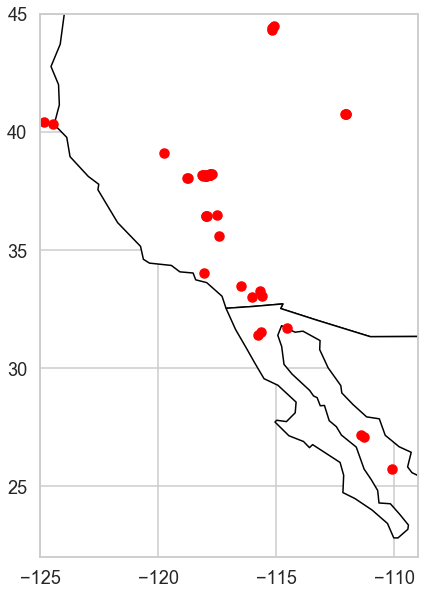

In [149]:
# This looks interesting. Let's go ahead and take a snapshot of the Western United States as 
# our testing ground since we know California has nuclear energy powerplants. We'll 
# start by plotting out all of the 4.5 and above magnitude earthquakes that have taken place 
# over the past year.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

#restrict to western part of North America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black', figsize=(15, 10))
ax.set_xlim(-125, -109)
ax.set_ylim(22, 45)

gdf.plot(ax=ax, color='red')

plt.show()

What is interesting about this is that we immediately begin to see a pattern of 
recorded earthquakes. They seem to be clustered together at specific points on the map.
Could these be where nuclear energy powerplants are? Let's se a map of those locations

<img src="westernnuclear.png">

well, as you can see, there are some nuclear reactors in the general western half of the US 
but not nearly enough to make sense of the amount of red dots on the above graph.
in addition, they aren't directly in that same path as the red dots. Furthermore,
if we zoom out a bit and see the entirety of the US, we see that there are QUITE a few 
nuclear reactors on the east coast.

<img src="usnuclear.png">

we would then logically assume that there must be a whole lot of earthquakes on the 
eastcoast, right? Let's go ahead and plot the data via the latitude and longitude 
coordinates on the whole USA just to compare

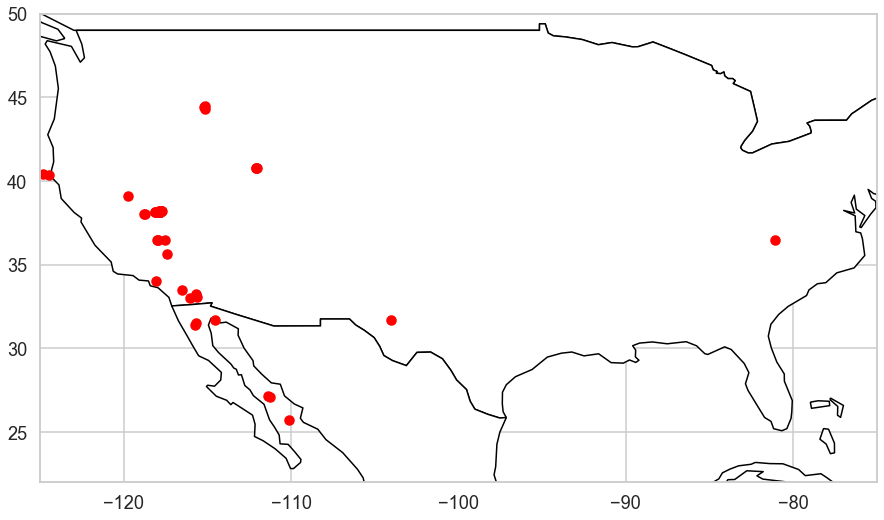

In [173]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

#restrict to western part of North America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black', figsize=(15, 10))
ax.set_xlim(-125, -75)
ax.set_ylim(22, 50)
gdf.plot(ax=ax, color='red')

plt.show()

wow. Well now, there are barely ANY recorded earthquakes on the east coast! This theory
is looking a whole lot less plausible. But if the youtube video wasn't right, then what 
could it be? Recall that a long time ago we were taught that earthquakes are caused by 
different types of friction along the earth's tectonic plates. Let's see if we can find
a map that shows where those lie.

<img src="tectonic.png" width = 450px>

wow! As you can see, the plates line up almost exactly where the bundle of most recently
recorded earthquakes were! 
While science reminds us that we can never know anything for sure, we now can take the data 
so abundantly at our disposal online and make a distinction for ourselves of which 
answer is actually the most probable. 